In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'D:\dataset_fyp\sample1.csv')
print(df.dtypes)
df.set_index('Date/Time',inplace=True)
print(df.head(5))
temp = df['Temp']
bp1 = df['Sys']
bp2 = df['Dias']
bpm = df['BPM']

print(temp.head(5))
print(bp1.head(5))
print(bp2.head(5))
print(bpm.head(5))

Date/Time     object
Temp         float64
BPM            int64
Sys            int64
Dias           int64
dtype: object
                Temp  BPM  Sys  Dias
Date/Time                           
7/1/2022 0:00   35.8   62  101    67
7/1/2022 4:00   37.3   63   92    62
7/1/2022 8:00   36.4   64  117    64
7/1/2022 12:00  35.1   63   91    68
7/1/2022 16:00  36.3   64  113    70
Date/Time
7/1/2022 0:00     35.8
7/1/2022 4:00     37.3
7/1/2022 8:00     36.4
7/1/2022 12:00    35.1
7/1/2022 16:00    36.3
Name: Temp, dtype: float64
Date/Time
7/1/2022 0:00     101
7/1/2022 4:00      92
7/1/2022 8:00     117
7/1/2022 12:00     91
7/1/2022 16:00    113
Name: Sys, dtype: int64
Date/Time
7/1/2022 0:00     67
7/1/2022 4:00     62
7/1/2022 8:00     64
7/1/2022 12:00    68
7/1/2022 16:00    70
Name: Dias, dtype: int64
Date/Time
7/1/2022 0:00     62
7/1/2022 4:00     63
7/1/2022 8:00     64
7/1/2022 12:00    63
7/1/2022 16:00    64
Name: BPM, dtype: int64


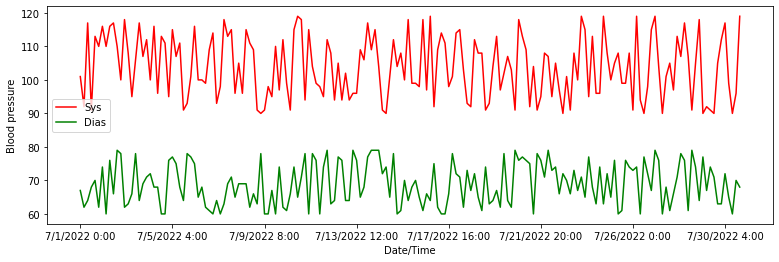

In [3]:
plt.figure(figsize=(13,4)) 
plt.xlabel("Date-Time")
plt.ylabel("Blood pressure")
bp1.plot(color='red')
bp2.plot(color='green')
plt.legend()

In [4]:
def df_to_X_y(df, window_size=2):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 2
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X2, y2 = df_to_X_y(bp1, WINDOW_SIZE)
X3, y3 = df_to_X_y(bp2, WINDOW_SIZE)
X4, y4 = df_to_X_y(bpm, WINDOW_SIZE)
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)
print(X4.shape, y4.shape)

(178, 2, 1) (178,)
(178, 2, 1) (178,)
(178, 2, 1) (178,)
(178, 2, 1) (178,)


In [8]:
X1_train = X1[0:122]
y1_train = y1[0:122]
X1_val = X1[122:150] 
y1_val = y1[122:150]
X1_test = X1[150:176]
y1_test = y1[150:176]
X2_train = X2[0:122]
y2_train = y2[0:122]
X2_val = X2[122:150]
y2_val = y2[122:150]
X2_test = X2[150:176]
y2_test = y2[150:176]
X3_train = X3[0:122]
y3_train = y3[0:122]
X3_val = X3[122:150]
y3_val = y3[122:150]
X3_test = X3[150:176]
y3_test = y3[150:176]
X4_train = X4[0:122] 
y4_train = y4[0:122]
X4_val = X4[122:150]
y4_val = y4[122:150]
X4_test = X4[150:176]
y4_test = y4[150:176]

print(X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape)
print(X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape)
print(X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape)
print(X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape)


(122, 2, 1) (122,) (28, 2, 1) (28,) (26, 2, 1) (26,)
(122, 2, 1) (122,) (28, 2, 1) (28,) (26, 2, 1) (26,)
(122, 2, 1) (122,) (28, 2, 1) (28,) (26, 2, 1) (26,)
(122, 2, 1) (122,) (28, 2, 1) (28,) (26, 2, 1) (26,)


In [66]:
model1 = Sequential()
model1.add(LSTM(86, activation='ReLU', input_shape=(2, 1), return_sequences=True))
model1.add(LSTM(64, activation='ReLU', return_sequences=False))
#model.add(Dropout(0.1))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

model2 = Sequential()
model2.add(LSTM(86, activation='ReLU', input_shape=(2, 1), return_sequences=True))
model2.add(LSTM(64, activation='ReLU', return_sequences=True))
model2.add(LSTM(32, activation='ReLU', return_sequences=False))
model2.add(Dropout(0.4))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.summary()

model3 = Sequential()
model3.add(LSTM(86, activation='ReLU', input_shape=(2, 1), return_sequences=True))
model3.add(LSTM(64, activation='ReLU', return_sequences=True))
model3.add(LSTM(32, activation='ReLU', return_sequences=False))
model3.add(Dropout(0.4))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')
model3.summary()

model4 = Sequential()
model4.add(LSTM(86, activation='ReLU', input_shape=(2, 1), return_sequences=True))
model4.add(LSTM(64, activation='ReLU', return_sequences=False))
#model.add(Dropout(0.1))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')
model4.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 2, 86)             30272     
                                                                 
 lstm_103 (LSTM)             (None, 64)                38656     
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                                 
Total params: 68,993
Trainable params: 68,993
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_104 (LSTM)             (None, 2, 86)             30272     
                                                                 
 lstm_105 (LSTM)          

In [67]:
#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=44, callbacks=[cp1])
#model.fit(X_train, y_train, epochs=60)
model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=66)
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=266)
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=266)
model4.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=88)


Epoch 1/66
4/4 [==============================] - 7s 167ms/step - loss: 1315.1146 - val_loss: 1254.3701
Epoch 2/66
4/4 [==============================] - 0s 28ms/step - loss: 1267.8129 - val_loss: 1200.4622
Epoch 3/66
4/4 [==============================] - 0s 19ms/step - loss: 1204.5571 - val_loss: 1122.2019
Epoch 4/66
4/4 [==============================] - 0s 20ms/step - loss: 1109.7744 - val_loss: 998.6865
Epoch 5/66
4/4 [==============================] - 0s 17ms/step - loss: 958.3940 - val_loss: 801.3527
Epoch 6/66
4/4 [==============================] - 0s 23ms/step - loss: 720.1268 - val_loss: 504.8488
Epoch 7/66
4/4 [==============================] - 0s 18ms/step - loss: 389.1256 - val_loss: 164.8041
Epoch 8/66
4/4 [==============================] - 0s 17ms/step - loss: 84.7882 - val_loss: 0.9268
Epoch 9/66
4/4 [==============================] - 0s 22ms/step - loss: 25.2810 - val_loss: 82.7936
Epoch 10/66
4/4 [==============================] - 0s 17ms/step - loss: 89.3598 - val_lo

4/4 [==============================] - 0s 18ms/step - loss: 794.2948 - val_loss: 140.0692
Epoch 18/266
4/4 [==============================] - 0s 18ms/step - loss: 934.0107 - val_loss: 143.0851
Epoch 19/266
4/4 [==============================] - 0s 17ms/step - loss: 879.3100 - val_loss: 180.8473
Epoch 20/266
4/4 [==============================] - 0s 18ms/step - loss: 903.4464 - val_loss: 225.9213
Epoch 21/266
4/4 [==============================] - 0s 16ms/step - loss: 1059.9840 - val_loss: 250.7370
Epoch 22/266
4/4 [==============================] - 0s 16ms/step - loss: 856.2291 - val_loss: 245.7947
Epoch 23/266
4/4 [==============================] - 0s 16ms/step - loss: 913.8515 - val_loss: 228.2009
Epoch 24/266
4/4 [==============================] - 0s 15ms/step - loss: 771.9236 - val_loss: 196.7686
Epoch 25/266
4/4 [==============================] - 0s 22ms/step - loss: 885.5837 - val_loss: 144.0824
Epoch 26/266
4/4 [==============================] - 0s 15ms/step - loss: 797.7570 - v

Epoch 97/266
4/4 [==============================] - 0s 18ms/step - loss: 642.8610 - val_loss: 231.9791
Epoch 98/266
4/4 [==============================] - 0s 18ms/step - loss: 673.6403 - val_loss: 116.8332
Epoch 99/266
4/4 [==============================] - 0s 22ms/step - loss: 772.8206 - val_loss: 99.3669
Epoch 100/266
4/4 [==============================] - 0s 20ms/step - loss: 919.9529 - val_loss: 91.5474
Epoch 101/266
4/4 [==============================] - 0s 18ms/step - loss: 839.0590 - val_loss: 155.2666
Epoch 102/266
4/4 [==============================] - 0s 19ms/step - loss: 728.7733 - val_loss: 149.8653
Epoch 103/266
4/4 [==============================] - 0s 18ms/step - loss: 541.8591 - val_loss: 111.1855
Epoch 104/266
4/4 [==============================] - 0s 18ms/step - loss: 705.8160 - val_loss: 118.0935
Epoch 105/266
4/4 [==============================] - 0s 17ms/step - loss: 835.2408 - val_loss: 145.2281
Epoch 106/266
4/4 [==============================] - 0s 20ms/step - l

4/4 [==============================] - 0s 33ms/step - loss: 592.9976 - val_loss: 144.7080
Epoch 177/266
4/4 [==============================] - 0s 15ms/step - loss: 743.2208 - val_loss: 124.7803
Epoch 178/266
4/4 [==============================] - 0s 21ms/step - loss: 662.1877 - val_loss: 87.5585
Epoch 179/266
4/4 [==============================] - 0s 14ms/step - loss: 710.6606 - val_loss: 84.9110
Epoch 180/266
4/4 [==============================] - 0s 15ms/step - loss: 571.0059 - val_loss: 105.3392
Epoch 181/266
4/4 [==============================] - 0s 14ms/step - loss: 757.8111 - val_loss: 186.8737
Epoch 182/266
4/4 [==============================] - 0s 15ms/step - loss: 650.3135 - val_loss: 132.7388
Epoch 183/266
4/4 [==============================] - 0s 15ms/step - loss: 778.5803 - val_loss: 84.4028
Epoch 184/266
4/4 [==============================] - 0s 15ms/step - loss: 639.9182 - val_loss: 99.0176
Epoch 185/266
4/4 [==============================] - 0s 14ms/step - loss: 661.7742

4/4 [==============================] - 0s 15ms/step - loss: 742.9225 - val_loss: 95.7361
Epoch 256/266
4/4 [==============================] - 0s 14ms/step - loss: 519.5492 - val_loss: 101.2149
Epoch 257/266
4/4 [==============================] - 0s 15ms/step - loss: 620.0310 - val_loss: 108.8592
Epoch 258/266
4/4 [==============================] - 0s 14ms/step - loss: 652.9332 - val_loss: 98.9017
Epoch 259/266
4/4 [==============================] - 0s 14ms/step - loss: 750.2492 - val_loss: 109.1642
Epoch 260/266
4/4 [==============================] - 0s 15ms/step - loss: 711.4302 - val_loss: 128.6006
Epoch 261/266
4/4 [==============================] - 0s 14ms/step - loss: 707.7261 - val_loss: 130.0818
Epoch 262/266
4/4 [==============================] - 0s 14ms/step - loss: 588.7411 - val_loss: 131.9777
Epoch 263/266
4/4 [==============================] - 0s 14ms/step - loss: 854.0214 - val_loss: 143.1266
Epoch 264/266
4/4 [==============================] - 0s 14ms/step - loss: 803.80

4/4 [==============================] - 0s 18ms/step - loss: 282.0159 - val_loss: 70.6485
Epoch 70/266
4/4 [==============================] - 0s 18ms/step - loss: 311.3492 - val_loss: 31.5983
Epoch 71/266
4/4 [==============================] - 0s 15ms/step - loss: 358.3342 - val_loss: 53.1556
Epoch 72/266
4/4 [==============================] - 0s 15ms/step - loss: 241.9068 - val_loss: 87.7914
Epoch 73/266
4/4 [==============================] - 0s 16ms/step - loss: 294.9113 - val_loss: 66.0196
Epoch 74/266
4/4 [==============================] - 0s 16ms/step - loss: 228.6596 - val_loss: 37.9291
Epoch 75/266
4/4 [==============================] - 0s 15ms/step - loss: 326.5048 - val_loss: 37.4618
Epoch 76/266
4/4 [==============================] - 0s 14ms/step - loss: 264.8435 - val_loss: 40.7814
Epoch 77/266
4/4 [==============================] - 0s 14ms/step - loss: 255.4061 - val_loss: 74.7792
Epoch 78/266
4/4 [==============================] - 0s 16ms/step - loss: 257.8704 - val_loss: 7

Epoch 149/266
4/4 [==============================] - 0s 21ms/step - loss: 278.3990 - val_loss: 67.8657
Epoch 150/266
4/4 [==============================] - 0s 15ms/step - loss: 239.7949 - val_loss: 68.6477
Epoch 151/266
4/4 [==============================] - 0s 14ms/step - loss: 292.4117 - val_loss: 69.2981
Epoch 152/266
4/4 [==============================] - 0s 14ms/step - loss: 238.3955 - val_loss: 54.3998
Epoch 153/266
4/4 [==============================] - 0s 15ms/step - loss: 235.1727 - val_loss: 33.6388
Epoch 154/266
4/4 [==============================] - 0s 15ms/step - loss: 216.5302 - val_loss: 53.6598
Epoch 155/266
4/4 [==============================] - 0s 14ms/step - loss: 241.2833 - val_loss: 90.2833
Epoch 156/266
4/4 [==============================] - 0s 14ms/step - loss: 246.3156 - val_loss: 50.3313
Epoch 157/266
4/4 [==============================] - 0s 14ms/step - loss: 242.5545 - val_loss: 42.9958
Epoch 158/266
4/4 [==============================] - 0s 14ms/step - loss:

4/4 [==============================] - 0s 14ms/step - loss: 274.0512 - val_loss: 54.5231
Epoch 229/266
4/4 [==============================] - 0s 14ms/step - loss: 226.6006 - val_loss: 55.2991
Epoch 230/266
4/4 [==============================] - 0s 14ms/step - loss: 263.0992 - val_loss: 71.8301
Epoch 231/266
4/4 [==============================] - 0s 15ms/step - loss: 242.8075 - val_loss: 41.2622
Epoch 232/266
4/4 [==============================] - 0s 14ms/step - loss: 252.1444 - val_loss: 48.7078
Epoch 233/266
4/4 [==============================] - 0s 14ms/step - loss: 253.6226 - val_loss: 67.4714
Epoch 234/266
4/4 [==============================] - 0s 14ms/step - loss: 294.5636 - val_loss: 63.3066
Epoch 235/266
4/4 [==============================] - 0s 15ms/step - loss: 320.9289 - val_loss: 35.4504
Epoch 236/266
4/4 [==============================] - 0s 15ms/step - loss: 267.6725 - val_loss: 39.4883
Epoch 237/266
4/4 [==============================] - 0s 20ms/step - loss: 262.4422 - va

4/4 [==============================] - 0s 14ms/step - loss: 1.4428 - val_loss: 1.3279
Epoch 44/88
4/4 [==============================] - 0s 18ms/step - loss: 1.4459 - val_loss: 1.3255
Epoch 45/88
4/4 [==============================] - 0s 13ms/step - loss: 1.4426 - val_loss: 1.3253
Epoch 46/88
4/4 [==============================] - 0s 14ms/step - loss: 1.4455 - val_loss: 1.3252
Epoch 47/88
4/4 [==============================] - 0s 13ms/step - loss: 1.4402 - val_loss: 1.3253
Epoch 48/88
4/4 [==============================] - 0s 13ms/step - loss: 1.4507 - val_loss: 1.3349
Epoch 49/88
4/4 [==============================] - 0s 13ms/step - loss: 1.4458 - val_loss: 1.3277
Epoch 50/88
4/4 [==============================] - 0s 13ms/step - loss: 1.4447 - val_loss: 1.3242
Epoch 51/88
4/4 [==============================] - 0s 14ms/step - loss: 1.4412 - val_loss: 1.3240
Epoch 52/88
4/4 [==============================] - 0s 14ms/step - loss: 1.4407 - val_loss: 1.3243
Epoch 53/88
4/4 [===============

In [68]:
model1.evaluate(X1_val,y1_val)
model2.evaluate(X2_val,y2_val)
model3.evaluate(X3_val,y3_val)
model4.evaluate(X4_val,y4_val)

1/1 [==============================] - 0s 25ms/step - loss: 1.3141


1.3140748739242554

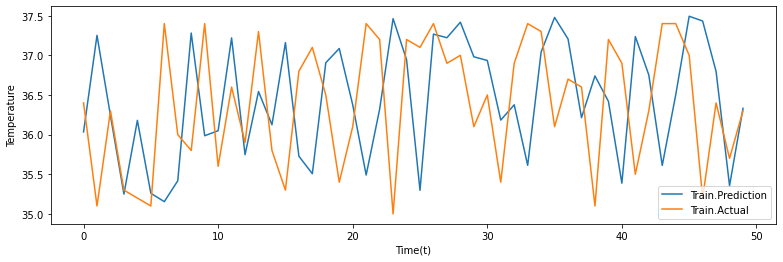

In [63]:
train_predictions = model1.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

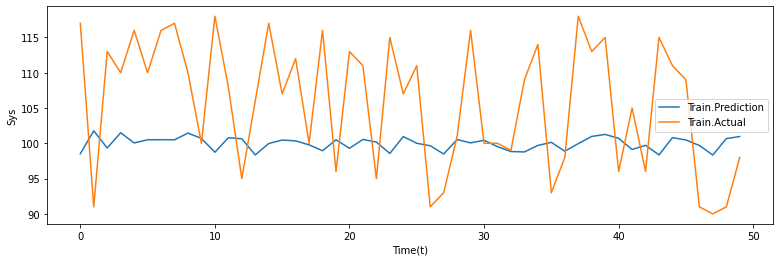

In [64]:
train_predictions = model2.predict(X2_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y2_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Sys")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

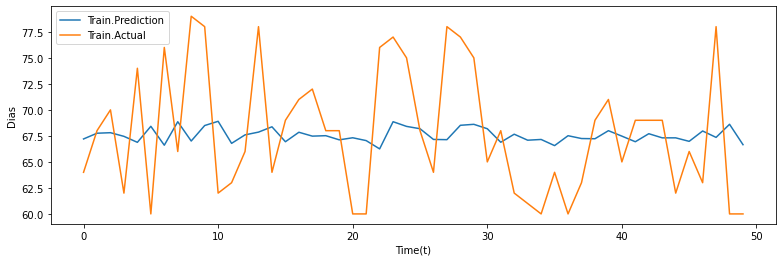

In [18]:
train_predictions = model3.predict(X3_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y3_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Dias")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

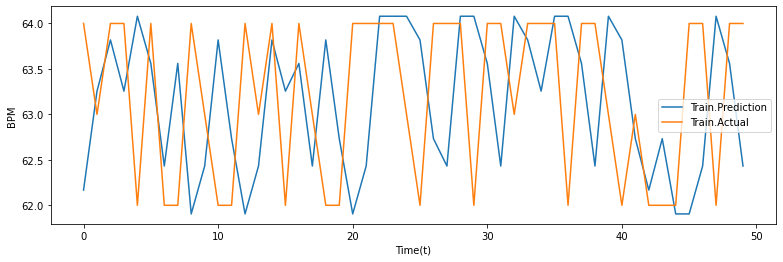

In [65]:
train_predictions = model4.predict(X4_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y4_train})
train_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("BPM")
plt.plot(train_results['Train Predictions'][0:50])
plt.plot(train_results['Actuals'][0:50])
plt.legend(['Train.Prediction','Train.Actual'])

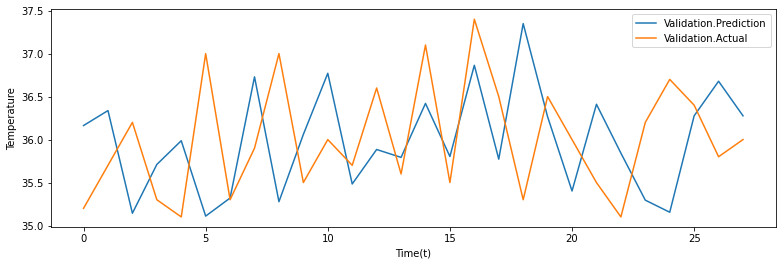

In [156]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
plt.plot(val_results['Val Predictions'][0:28])
plt.plot(val_results['Actuals'][0:50])
plt.legend(['Validation.Prediction','Validation.Actual'])

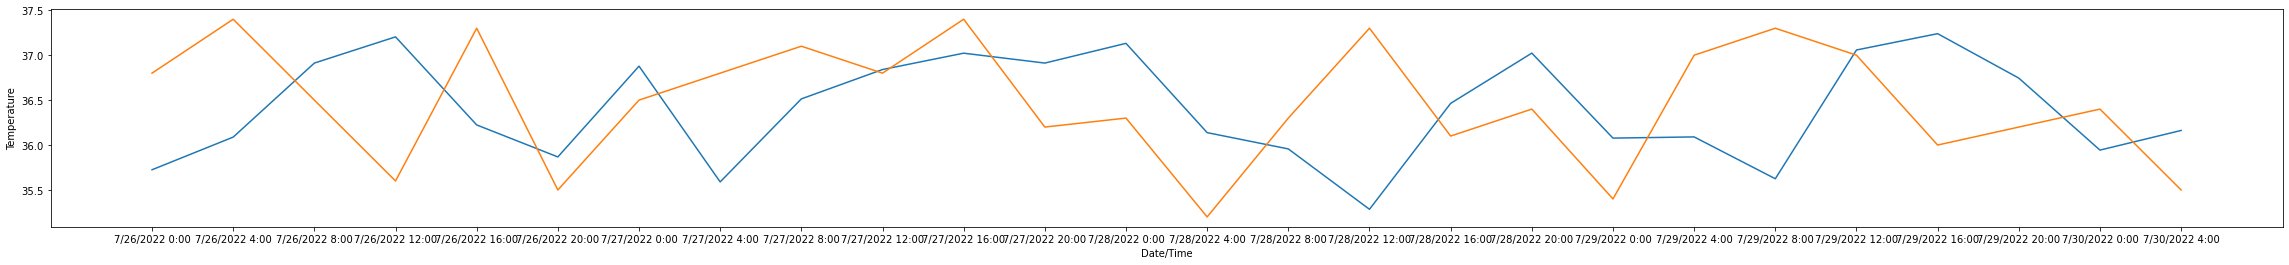

In [143]:
test_predictions = model.predict(X_test).flatten()
#test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test, 'Date/Time':df.index[151:175]})
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Date/Time':df.index[150:176]})
test_results
test_results.set_index('Date/Time', inplace=True)
plt.figure(figsize=(40,4)) 
plt.xlabel("Date/Time")
plt.ylabel("Temperature")
plt.plot(test_results['Test Predictions'])
plt.plot(y_test)
#plt.legend(['Validation.Prediction','Validation.Actual'])